
 Welcome to Document Scanning System 
 This program performs:
 1. Image acquisition
 2. Resolution sampling analysis
 3. Gray-level quantization
 4. OCR suitability observations



Load image from (1) File or (2) Webcam? :  2


Press SPACE to capture image

=========== Observations ===========
1. Loss of Fine Text Details:
- Lower resolutions blur edges and small fonts disappear.

2. Readability Degradation:
- 256x256 remains readable
- 128x128 significantly reduces clarity

3. OCR Suitability:
- High resolution + 8-bit gray best for OCR
- Medium resolution usable
- Low resolution or 2-bit unsuitable



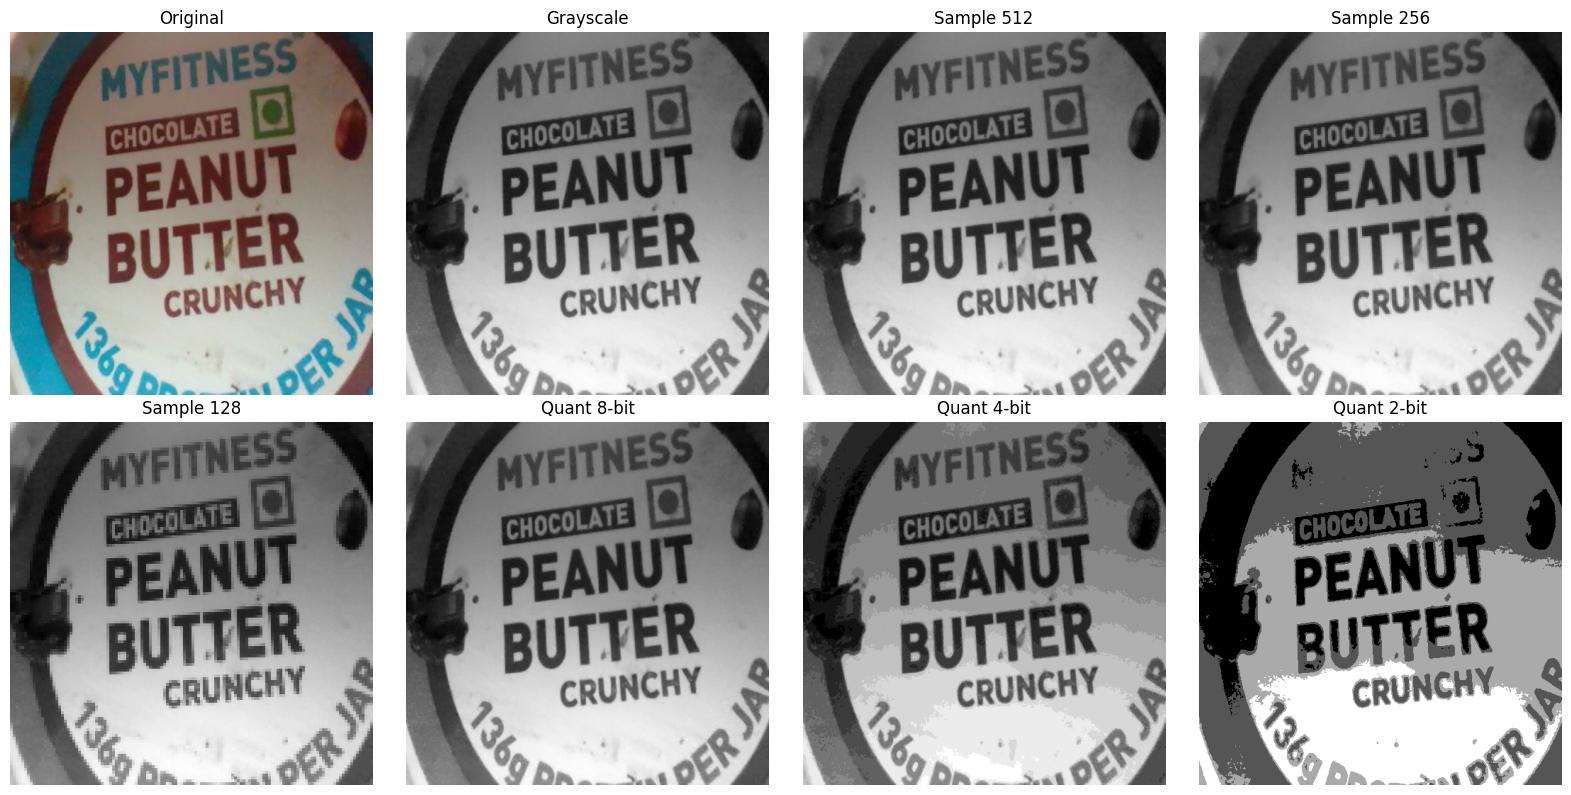

Processing complete! Results saved in outputs/ folder


In [2]:
# ============================================================
# Name: Sagar
# Roll No: 2301010312
# Course: Digital Image Processing
# Unit: Image Sampling & Quantization
# Assignment Title: Document Scanner Analysis System
# Date: 10 / 02 / 2026
# ============================================================

import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

# ---------------- Task 1: Setup ---------------- #

print("\n==========================================")
print(" Welcome to Document Scanning System ")
print(" This program performs:")
print(" 1. Image acquisition")
print(" 2. Resolution sampling analysis")
print(" 3. Gray-level quantization")
print(" 4. OCR suitability observations")
print("==========================================\n")

# Create output directory
OUTPUT_DIR = "outputs"
os.makedirs(OUTPUT_DIR, exist_ok=True)


# ---------- Utility Functions ---------- #

def load_image():
    """
    Load image from file OR webcam
    """
    choice = input("Load image from (1) File or (2) Webcam? : ")

    if choice == "2":
        cam = cv2.VideoCapture(0)
        print("Press SPACE to capture image")

        while True:
            ret, frame = cam.read()
            cv2.imshow("Webcam", frame)
            key = cv2.waitKey(1)

            if key % 256 == 32:  # SPACE pressed
                img = frame
                break

        cam.release()
        cv2.destroyAllWindows()

    else:
        path = input("Enter image path: ")
        img = cv2.imread(path)

        if img is None:
            print("Error loading image.")
            exit()

    return img


def resize_and_gray(img):
    img_resized = cv2.resize(img, (512, 512))
    gray = cv2.cvtColor(img_resized, cv2.COLOR_BGR2GRAY)
    return img_resized, gray


# -------- Task 3: Sampling -------- #

def sampling(gray):
    sizes = [512, 256, 128]
    results = []

    for s in sizes:
        down = cv2.resize(gray, (s, s))
        up = cv2.resize(down, (512, 512),
                        interpolation=cv2.INTER_NEAREST)
        results.append(up)
        cv2.imwrite(f"{OUTPUT_DIR}/sample_{s}.png", up)

    return results


# -------- Task 4: Quantization -------- #

def quantize(gray, levels):
    factor = 256 // levels
    quant = (gray // factor) * factor
    return quant.astype(np.uint8)


def quantization(gray):
    levels_list = [256, 16, 4]
    results = []

    for lv in levels_list:
        q = quantize(gray, lv)
        results.append(q)
        cv2.imwrite(f"{OUTPUT_DIR}/quant_{lv}.png", q)

    return results


# -------- Task 5: Observations -------- #

def print_observations():
    print("\n=========== Observations ===========")
    print("1. Loss of Fine Text Details:")
    print("- Lower resolutions blur edges and small fonts disappear.")

    print("\n2. Readability Degradation:")
    print("- 256x256 remains readable")
    print("- 128x128 significantly reduces clarity")

    print("\n3. OCR Suitability:")
    print("- High resolution + 8-bit gray best for OCR")
    print("- Medium resolution usable")
    print("- Low resolution or 2-bit unsuitable")
    print("=====================================\n")


# -------- Visualization -------- #

def show_all(original, gray, samples, quants):
    titles = [
        "Original", "Grayscale",
        "Sample 512", "Sample 256", "Sample 128",
        "Quant 8-bit", "Quant 4-bit", "Quant 2-bit"
    ]

    images = [
        cv2.cvtColor(original, cv2.COLOR_BGR2RGB),
        gray,
        samples[0], samples[1], samples[2],
        quants[0], quants[1], quants[2]
    ]

    plt.figure(figsize=(16, 8))

    for i in range(len(images)):
        plt.subplot(2, 4, i + 1)
        plt.imshow(images[i], cmap='gray')
        plt.title(titles[i])
        plt.axis('off')

    plt.tight_layout()
    plt.savefig(f"{OUTPUT_DIR}/comparison.png")
    plt.show()


# ================= MAIN FLOW ================= #

# Task 2
image = load_image()
original, gray = resize_and_gray(image)

cv2.imwrite(f"{OUTPUT_DIR}/original.png", original)
cv2.imwrite(f"{OUTPUT_DIR}/grayscale.png", gray)

# Task 3
sampled_images = sampling(gray)

# Task 4
quant_images = quantization(gray)

# Task 5
print_observations()

# Final Comparison Figure
show_all(original, gray, sampled_images, quant_images)

print("Processing complete! Results saved in outputs/ folder")
